### Introduction :
### This dataset contains house sales in King County.USA , the goal of this project is creating a good model for predictions
## The project is divided into preprocessing section , Model section , Assumptions sections 
### I'm using Multiple Linear Regression Algorithm achieve my goal

## Preprocessing Section 

In [ ]:
#importing necessary Libraries :
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline 

In [2]:
data=pd.read_csv('kc_house_data.csv') #reading the dataset

In [3]:
data.head() #displaying first 5 rows of the data 

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [4]:
data.info()   #type of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [5]:
data.id.duplicated().sum()   #searching for duplicated ids

177

In [11]:
data.id.drop_duplicates(inplace=True)  #dropping the duplicates

In [10]:
data.shape       #number of rows and columns 

(21613, 21)

In [20]:
data.id.duplicated().any() #making sure if any duplicated cells 

False

In [21]:
data.describe()   #statistics summary of the data 

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

In [22]:
data.isnull().sum()   #searching for null values 

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [23]:
data.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [29]:
columns_to_drop=['id','date']
data.drop(columns_to_drop,axis=1,inplace=True)   #dropping the id , date columns as they will not affect our model 

In [30]:
data.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0           0   
1  538000.0         3       2.25         2570      7242     2.0           0   
2  180000.0         2       1.00          770     10000     1.0           0   
3  604000.0         4       3.00         1960      5000     1.0           0   
4  510000.0         3       2.00         1680      8080     1.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7        1180              0      1955             0   
1     0          3      7        2170            400      1951          1991   
2     0          3      6         770              0      1933             0   
3     0          5      7        1050            910      1965             0   
4     0          3      8        1680              0      1987             0   

   zipcode      lat     long  sqft_living15  sqft_lot15  
0    98178  47.5112 -122.257           1340        5650  
1    98125  47.7210 -122.319           1690        7639  
2    98028  47.7379 -122.233           2720        8062  
3    98136  47.5208 -122.393           1360        5000  
4    98074  47.6168 -122.045           1800        7503

In [180]:
"""In the bathrooms, floors columns have float values which is totally wrong as you can't have a house with 2.5 bathrooms right?"""

"In the bathrooms, floors columns have float values which is totally wrong as you can't have a house with 2.5 bathrooms right?"

In [34]:
data['bathrooms']=data.bathrooms.round()   #rounding the bathrooms column

In [35]:
data.bathrooms.value_counts()  #counting each value of the bathrooms column

2.0    13851
1.0     3933
3.0     2527
4.0     1201
5.0       57
6.0       24
0.0       14
8.0        4
7.0        2
Name: bathrooms, dtype: int64

In [40]:
data['bathrooms']=data.bathrooms.astype('int64')   #converting the bathrooms column to int64 data type 

In [181]:
""" I will do the same for the floors column """

' I will do the same for the floors column '

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null int64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(4), int64(15)
memory usage: 3.1 MB


In [45]:
data['floors']=data.floors.round()

In [47]:
data['floors']=data.floors.astype('int64')

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null int64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null int64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(3), int64(16)
memory usage: 3.1 MB


In [182]:
""" as we have zipcode columns , then lat,long columns will only overload our model , so I'll remove them"""

" as we have zipcode columns , then lat,long columns will only overload our model , so I'll remove them"

In [49]:
drop_lat_long=['lat','long']

In [50]:
data.drop(drop_lat_long,axis=1,inplace=True)  #removing the lat , long columns 

In [51]:
data.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3          1         1180      5650       1           0   
1  538000.0         3          2         2570      7242       2           0   
2  180000.0         2          1          770     10000       1           0   
3  604000.0         4          3         1960      5000       1           0   
4  510000.0         3          2         1680      8080       1           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7        1180              0      1955             0   
1     0          3      7        2170            400      1951          1991   
2     0          3      6         770              0      1933             0   
3     0          5      7        1050            910      1965             0   
4     0          3      8        1680              0      1987             0   

   zipcode  sqft_living15  sqft_lot15  
0    98178           1340        5650  
1    98125           1690        7639  
2    98028           2720        8062  
3    98136           1360        5000  
4    98074           1800        7503

In [54]:
data['price']=data.price.round().astype('int64')   #converting price into integer data type 

In [55]:
data.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900         3          1         1180      5650       1           0   
1  538000         3          2         2570      7242       2           0   
2  180000         2          1          770     10000       1           0   
3  604000         4          3         1960      5000       1           0   
4  510000         3          2         1680      8080       1           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7        1180              0      1955             0   
1     0          3      7        2170            400      1951          1991   
2     0          3      6         770              0      1933             0   
3     0          5      7        1050            910      1965             0   
4     0          3      8        1680              0      1987             0   

   zipcode  sqft_living15  sqft_lot15  
0    98178           1340        5650  
1    98125           1690        7639  
2    98028           2720        8062  
3    98136           1360        5000  
4    98074           1800        7503

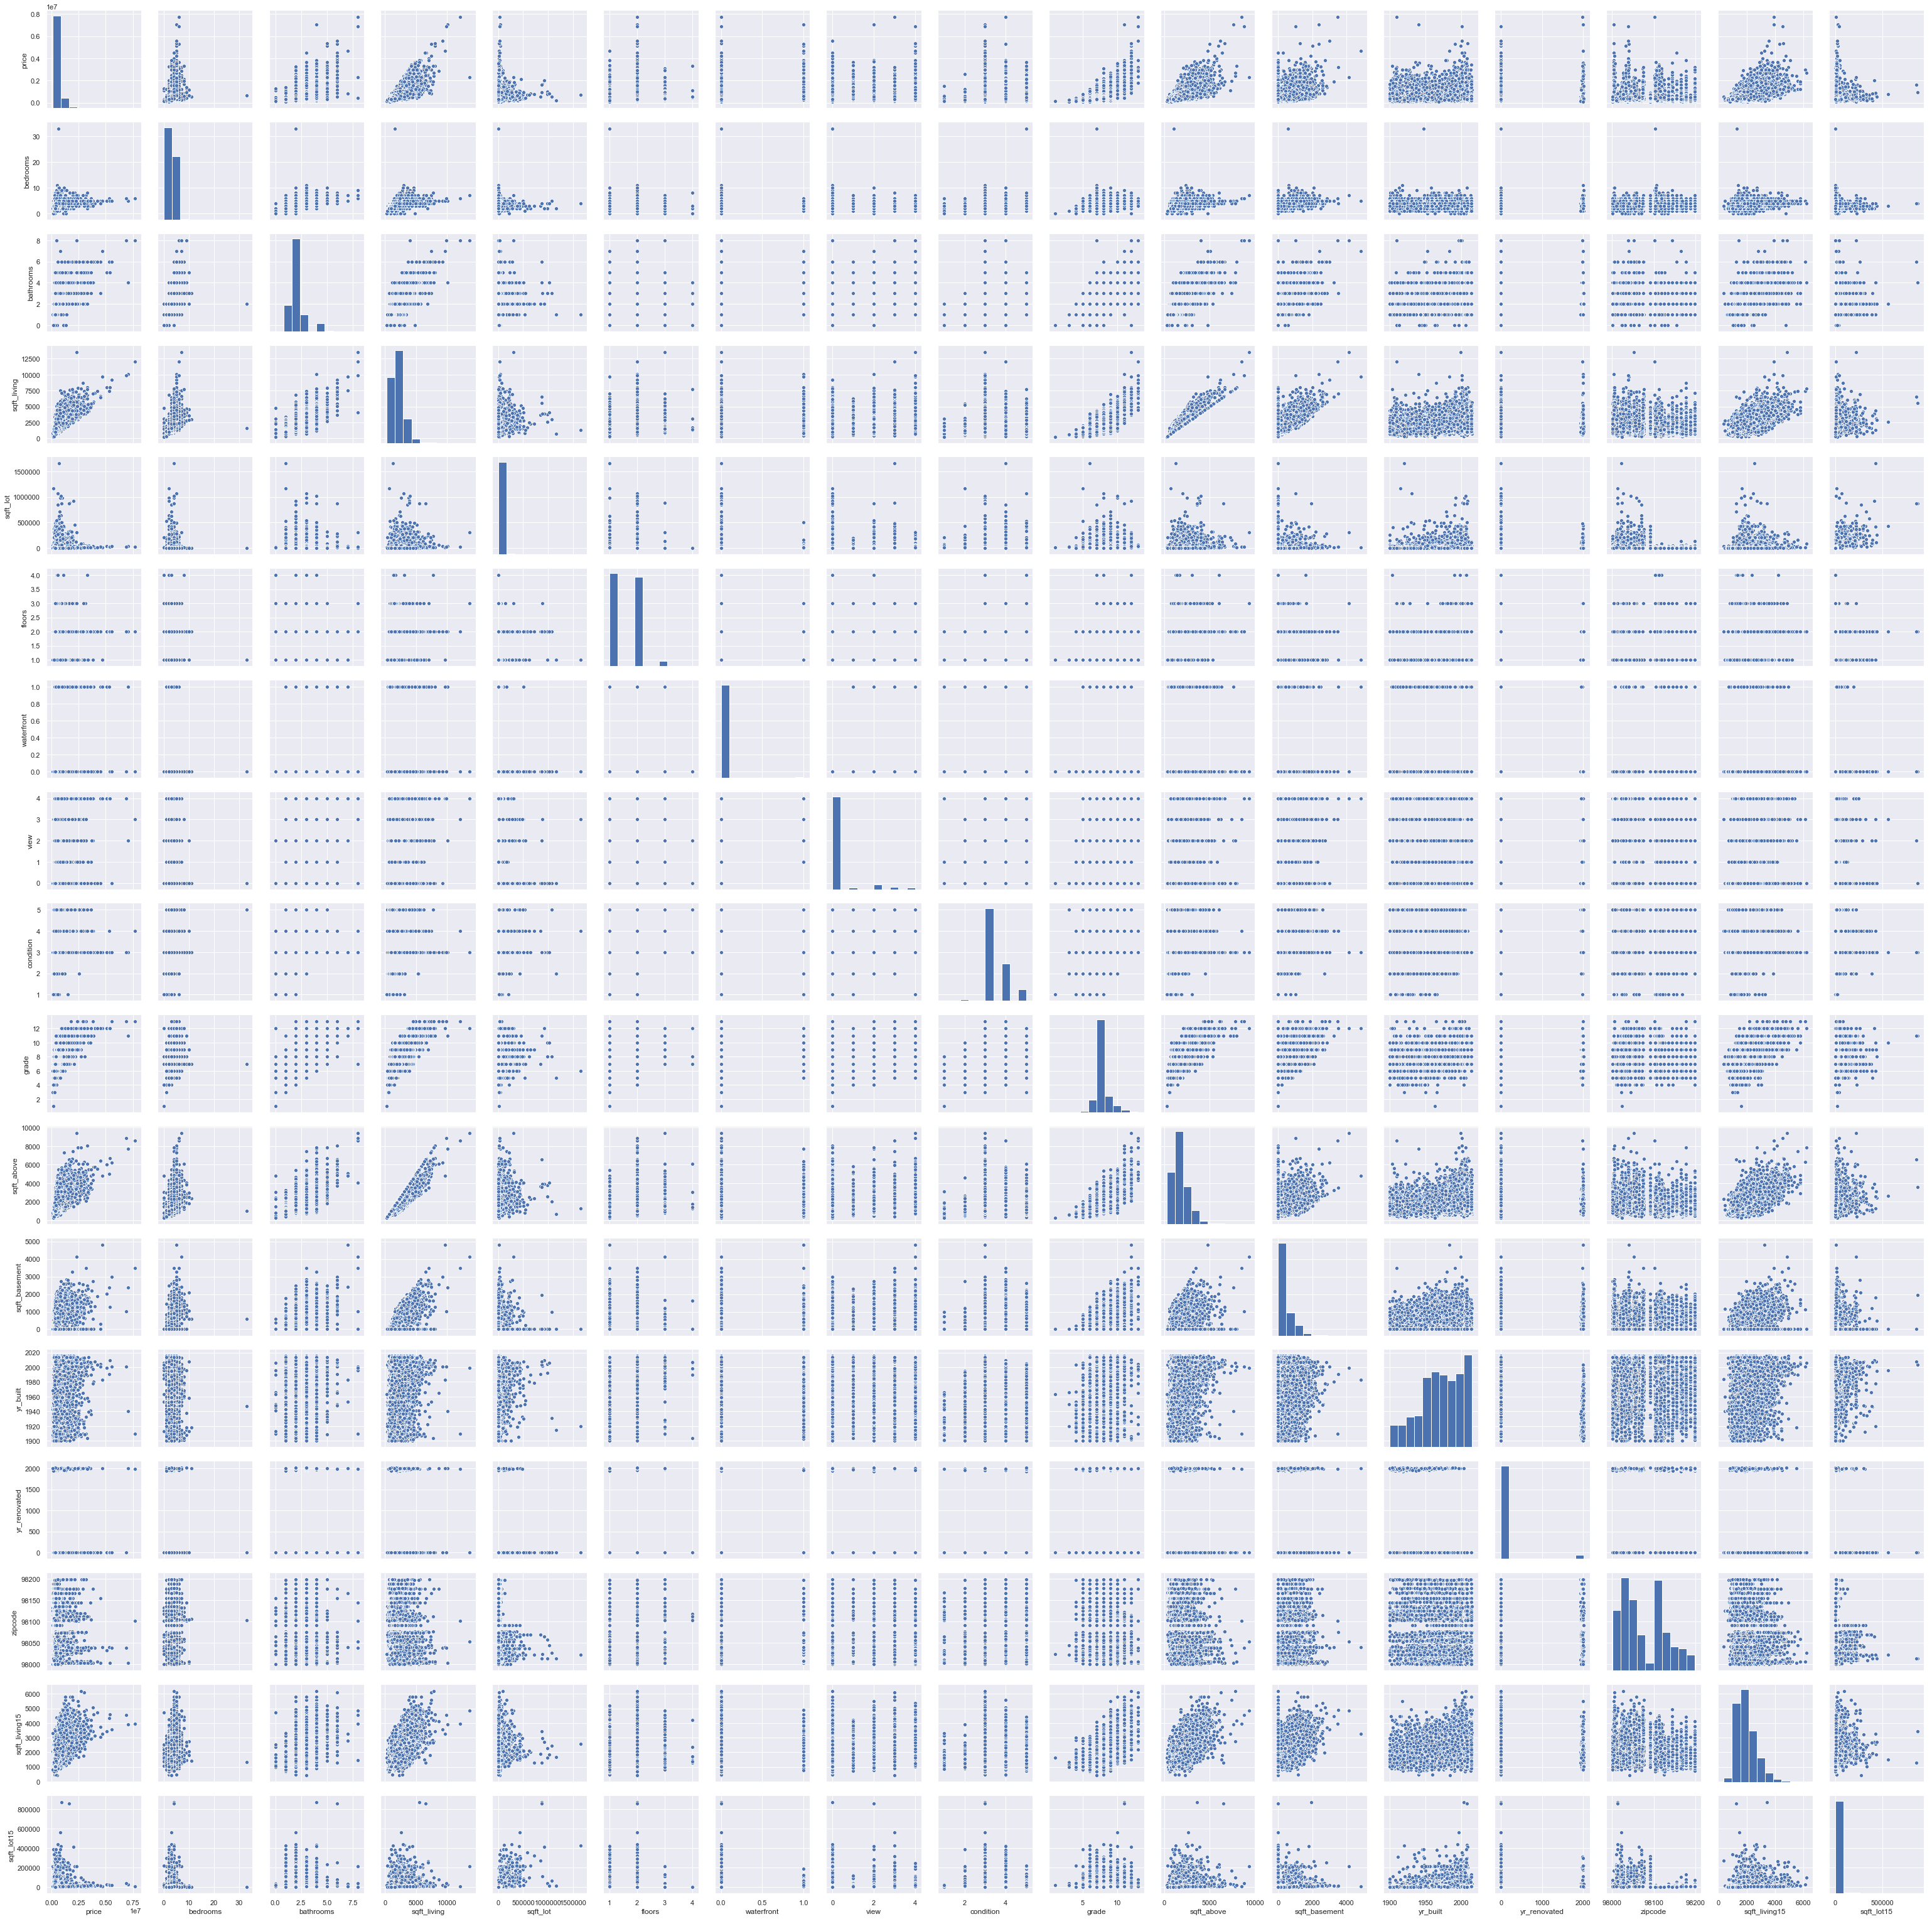

In [56]:
sns.pairplot(data)    #visualising the realtionship between independent & dependent variables 

(array([-1000000.,        0.,  1000000.,  2000000.,  3000000.,  4000000.,
         5000000.,  6000000.,  7000000.,  8000000.,  9000000.]),
 <a list of 11 Text xticklabel objects>)

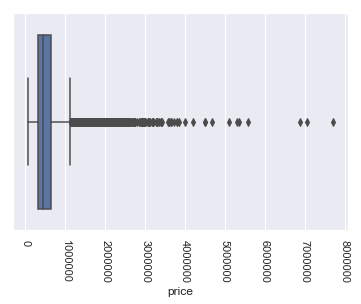

In [60]:
sns.boxplot(data['price'])   #checking for outliers in the price column 
plt.xticks(rotation=270)

In [183]:
""" in the visualization you see a large number of outliers """

' in the visualization you see a large number of outliers '

(array([-500000.,       0.,  500000., 1000000., 1500000., 2000000.,
        2500000., 3000000., 3500000., 4000000., 4500000.]),
 <a list of 11 Text xticklabel objects>)

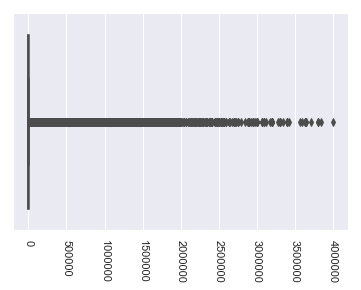

In [62]:
sns.boxplot(data[data['price']<=4000000])
plt.xticks(rotation=270)

In [184]:
""" let's getting the interquantile range and know the extreme and normal outliers """

" let's getting the interquantile range and know the extreme and normal outliers "

In [63]:

iqr=data.price.quantile(0.75)-data.price.quantile(0.25)   #measuring the interquantile range 

In [66]:
iqr

323050.0

In [67]:
upper_outlier=data.price.quantile(0.75)+1.5*iqr  #measuring the upper , lower outliers 
lower_outlier=data.price.quantile(0.25)-1.5*iqr

In [68]:
upper_outlier,lower_outlier

(1129575.0, -162625.0)

In [69]:
upper_exterme_outlier=data.price.quantile(0.75)+3*iqr   #getting the extreme outliers 

In [70]:
upper_exterme_outlier

1614150.0

In [72]:
data[data['price']>upper_exterme_outlier]   #getting the number of rows of extreme outliers 

(420, 17)

In [73]:
data[data['price']>upper_exterme_outlier].shape[0]-data.shape[0]

-21193

In [77]:
data_after_outliers=data[data['price']<upper_exterme_outlier]    #dropping the extreme outliers 

In [83]:
data=data_after_outliers

In [84]:
data.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900         3          1         1180      5650       1           0   
1  538000         3          2         2570      7242       2           0   
2  180000         2          1          770     10000       1           0   
3  604000         4          3         1960      5000       1           0   
4  510000         3          2         1680      8080       1           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7        1180              0      1955             0   
1     0          3      7        2170            400      1951          1991   
2     0          3      6         770              0      1933             0   
3     0          5      7        1050            910      1965             0   
4     0          3      8        1680              0      1987             0   

   zipcode  sqft_living15  sqft_lot15  
0    98178           1340        5650  
1    98125           1690        7639  
2    98028           2720        8062  
3    98136           1360        5000  
4    98074           1800        7503

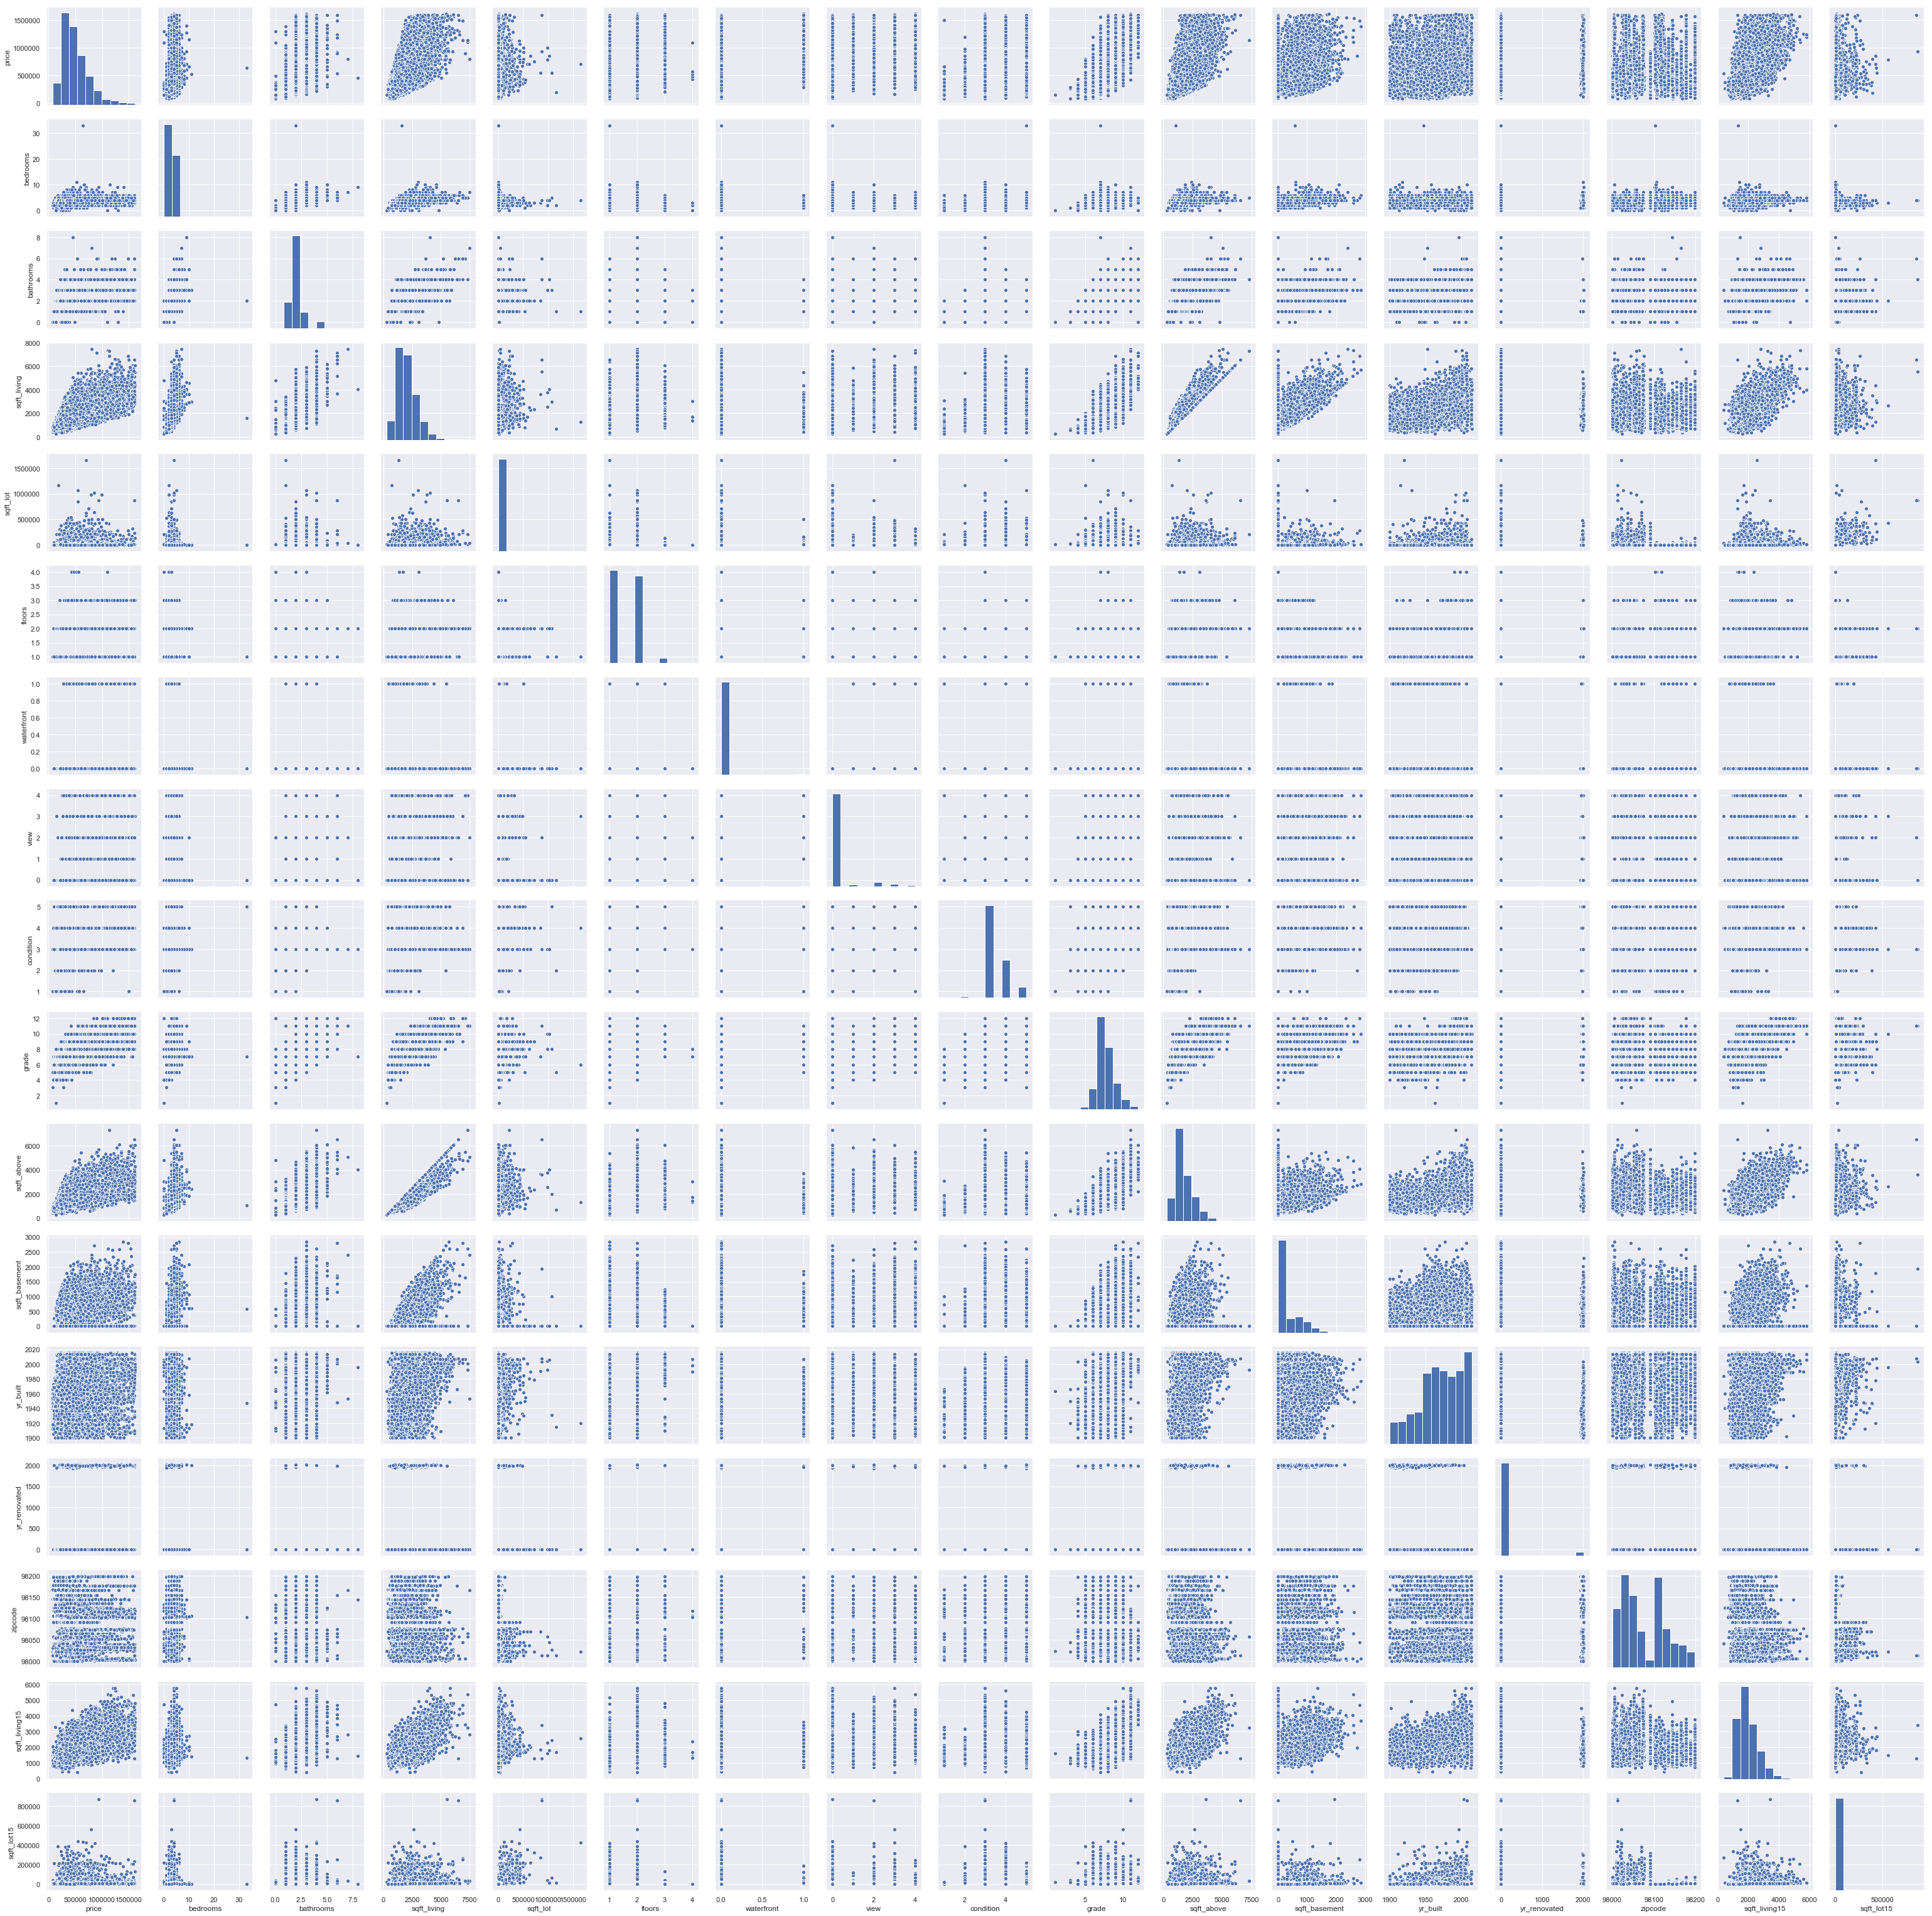

In [86]:
sns.pairplot(data)

In [85]:
data.yr_renovated.value_counts()

0       20344
2014       89
2013       36
2005       34
2007       32
2000       31
2003       30
2004       25
1990       23
2006       22
1989       21
2009       19
1984       18
2001       17
1986       17
2002       17
2010       17
1991       17
1983       17
1993       17
1985       16
1992       16
2015       16
1998       16
1999       15
1994       15
1996       15
1997       15
2008       15
1987       15
        ...  
1975        6
1978        6
1981        5
1964        5
1958        5
1973        5
1969        4
1972        4
1963        4
1965        4
1960        4
1955        3
1953        3
1945        3
1976        3
1974        3
1957        3
1956        3
1971        2
1950        2
1940        2
1946        2
1967        2
1962        2
1934        1
1948        1
1954        1
1959        1
1951        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [185]:
""" Now , we 've finished the preprocessing section, let's go to creating the model with statsmodels """

" Now , we 've finished the preprocessing section, let's go to creating the model with statsmodels "

# linear regression with statsmodels 

In [87]:
X=data.drop('price',axis=1) # defining x,y
y=data['price']

In [82]:
import statsmodels.api as sm   #importing libraries 

In [88]:
x=sm.add_constant(X)    #creating the model 
model_f=sm.OLS(y,x)

C:\Users\20115\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [89]:
model_f.fit().summary()   #summary with statsmodels 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     2432.
Date:                Sun, 22 Aug 2021   Prob (F-statistic):               0.00
Time:                        21:05:19   Log-Likelihood:            -2.8352e+05
No. Observations:               21193   AIC:                         5.671e+05
Df Residuals:                   21177   BIC:                         5.672e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -6.079e+06   2.28e+06     -2.661      0.008   -1.06e+07    -1.6e+06
bedrooms      -1.837e+04   1494.825    -12.287      0.000   -2.13e+04   -1.54e+04
bathrooms      3.459e+04   2177.905     15.882      0.000    3.03e+04    3.89e+04
sqft_living      57.2275      1.845     31.016      0.000      53.611      60.844
sqft_lot          0.0693      0.038      1.804      0.071      -0.006       0.145
floors         4.656e+04   2476.018     18.802      0.000    4.17e+04    5.14e+04
waterfront     1.681e+05   1.75e+04      9.631      0.000    1.34e+05    2.02e+05
view           2.999e+04   1730.385     17.329      0.000    2.66e+04    3.34e+04
condition      2.054e+04   1842.589     11.147      0.000    1.69e+04    2.42e+04
grade          1.073e+05   1665.609     64.420      0.000    1.04e+05    1.11e+05
sqft_above       14.4790      1.808      8.010      0.000      10.936      18.022
sqft_basement    42.7513      2.081     20.543      0.000      38.672      46.830
yr_built      -2718.6336     51.659    -52.627      0.000   -2819.889   -2617.379
yr_renovated     12.0494      2.919      4.128      0.000       6.328      17.771
zipcode         109.1297     22.946      4.756      0.000      64.154     154.105
sqft_living15    59.0521      2.789     21.171      0.000      53.585      64.519
sqft_lot15       -0.2820      0.057     -4.907      0.000      -0.395      -0.169
==============================================================================
Omnibus:                     3168.239   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8988.410
Skew:                           0.806   Prob(JB):                         0.00
Kurtosis:                       5.754   Cond. No.                     5.73e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.53e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

""" the sqt_lot column has a p_value >0.05 so, Im removing it """
# This called backward elimination

In [90]:
X=data.drop(['price','sqft_lot'],axis=1)  #x,y after removing the column 
y=data['price']

In [91]:
x=sm.add_constant(X)   #creating the model 
model_f=sm.OLS(y,x)


In [92]:
model_f.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     2605.
Date:                Sun, 22 Aug 2021   Prob (F-statistic):               0.00
Time:                        21:07:35   Log-Likelihood:            -2.8352e+05
No. Observations:               21193   AIC:                         5.671e+05
Df Residuals:                   21178   BIC:                         5.672e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -5.912e+06   2.28e+06     -2.590      0.010   -1.04e+07   -1.44e+06
bedrooms      -1.843e+04   1494.451    -12.335      0.000   -2.14e+04   -1.55e+04
bathrooms      3.463e+04   2177.903     15.901      0.000    3.04e+04    3.89e+04
sqft_living      57.3816      1.843     31.131      0.000      53.769      60.994
floors         4.644e+04   2475.378     18.762      0.000    4.16e+04    5.13e+04
waterfront     1.678e+05   1.75e+04      9.618      0.000    1.34e+05    2.02e+05
view           3.008e+04   1729.700     17.390      0.000    2.67e+04    3.35e+04
condition      2.049e+04   1842.458     11.119      0.000    1.69e+04    2.41e+04
grade          1.073e+05   1665.694     64.413      0.000    1.04e+05    1.11e+05
sqft_above       14.6848      1.804      8.140      0.000      11.149      18.221
sqft_basement    42.6972      2.081     20.518      0.000      38.618      46.776
yr_built      -2721.4665     51.638    -52.703      0.000   -2822.680   -2620.253
yr_renovated     12.0066      2.919      4.113      0.000       6.285      17.728
zipcode         107.4834     22.929      4.688      0.000      62.541     152.426
sqft_living15    58.8249      2.787     21.110      0.000      53.363      64.287
sqft_lot15       -0.2094      0.041     -5.105      0.000      -0.290      -0.129
==============================================================================
Omnibus:                     3163.915   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8956.007
Skew:                           0.805   Prob(JB):                         0.00
Kurtosis:                       5.748   Cond. No.                     5.58e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.69e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [188]:
"""Now all the columns has p-values <0.05 """

'Now all the columns has p-values <0.05 '

## creating the model with sklearn 

In [189]:
""" But let's scale the x values first"""

" But let's scale the x values first"

In [94]:
from sklearn.preprocessing import StandardScaler  #importing libearies
sc=StandardScaler()  #scaling the variables 
X=sc.fit_transform(X)

C:\Users\20115\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\20115\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [96]:
X

array([[-0.38353479, -1.43440993, -1.01777443, ...,  1.86747369,
        -0.94657862, -0.25673902],
       [-0.38353479, -0.04096248,  0.64463937, ...,  0.87490536,
        -0.41178284, -0.18369846],
       [-1.4688937 , -1.43440993, -1.5081267 , ..., -0.94168196,
         1.16204474, -0.16816495],
       ...,
       [-1.4688937 , -1.43440993, -1.20913141, ...,  1.23073175,
        -1.43553476, -0.39051819],
       [-0.38353479, -0.04096248, -0.51546235, ..., -0.96040966,
        -0.83961946, -0.41695821],
       [-1.4688937 , -1.43440993, -1.20913141, ...,  1.23073175,
        -1.43553476, -0.41438766]])

In [97]:
from sklearn.model_selection import train_test_split  #splitting the data 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [101]:
from sklearn.metrics import mean_absolute_error  #importig the necessary libraries 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [102]:
regressor=LinearRegression()   #creating the model 
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)

In [103]:
regressor.score(X_train,y_train)   #measuring the quality of the model 

0.6321639045977715

In [104]:
regressor.score(X_test,y_test)

0.6329618749441254

In [106]:
print('R squared : {}'.format(r2_score(y_true=y_test,y_pred=y_pred)))

R squared : 0.6329618749441254


## mean of residuals:

### mean of residuals as we know are the differnces between the true value and the predicted value 
### one of assumptions of linear regression is that the mean of residuals should be zero 

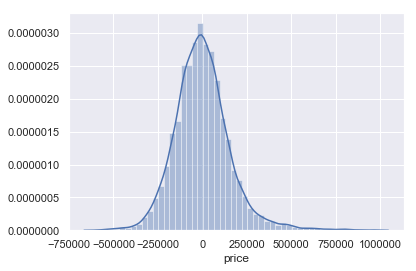

In [107]:
residuals = y_test-y_pred #getting the residuals 
sns.distplot(residuals)

In [108]:
print('The mean of residuals is {}'.format(np.mean(residuals)))

The mean of residuals is 258.2119171778877


## 3-Homoscedasticity 

## Homoscedasticity means that the residuals have equal or almost equal variance across the regression line by plotting the error terms with the predicted terms we check that there should not be any pattern in the error terms 

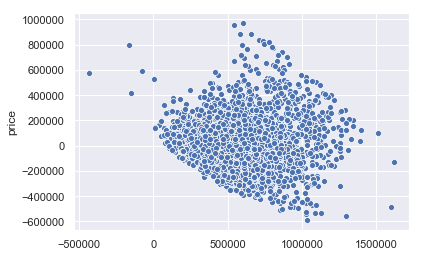

In [113]:
sns.scatterplot(y_pred,residuals)

In [115]:
""" True , they dont form any pattern """

' True , they dont form any pattern '

Text(0.5, 1.0, 'Normality of error terms /residuals')

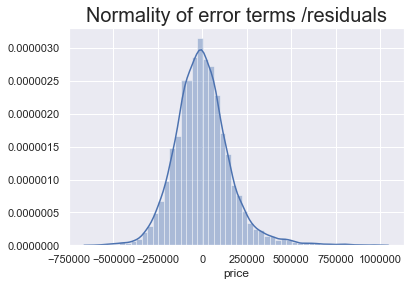

In [117]:
sns.distplot(residuals,kde=True)
plt.title('Normality of error terms /residuals',fontsize=20)

In [118]:
""" The residuals terms are pretty much normally distributed for the number of test points we took """

' The residuals terms are pretty much normally distributed for the number of test points we took '

In [119]:
"""remember the centeral limit theorem which indicates as the sample size increases the absorbtion tend to be normal """

'remember the centeral limit theorem which indicates as the sample size increases the absorbtion tend to be normal '

## Checking for Multicolinearity 

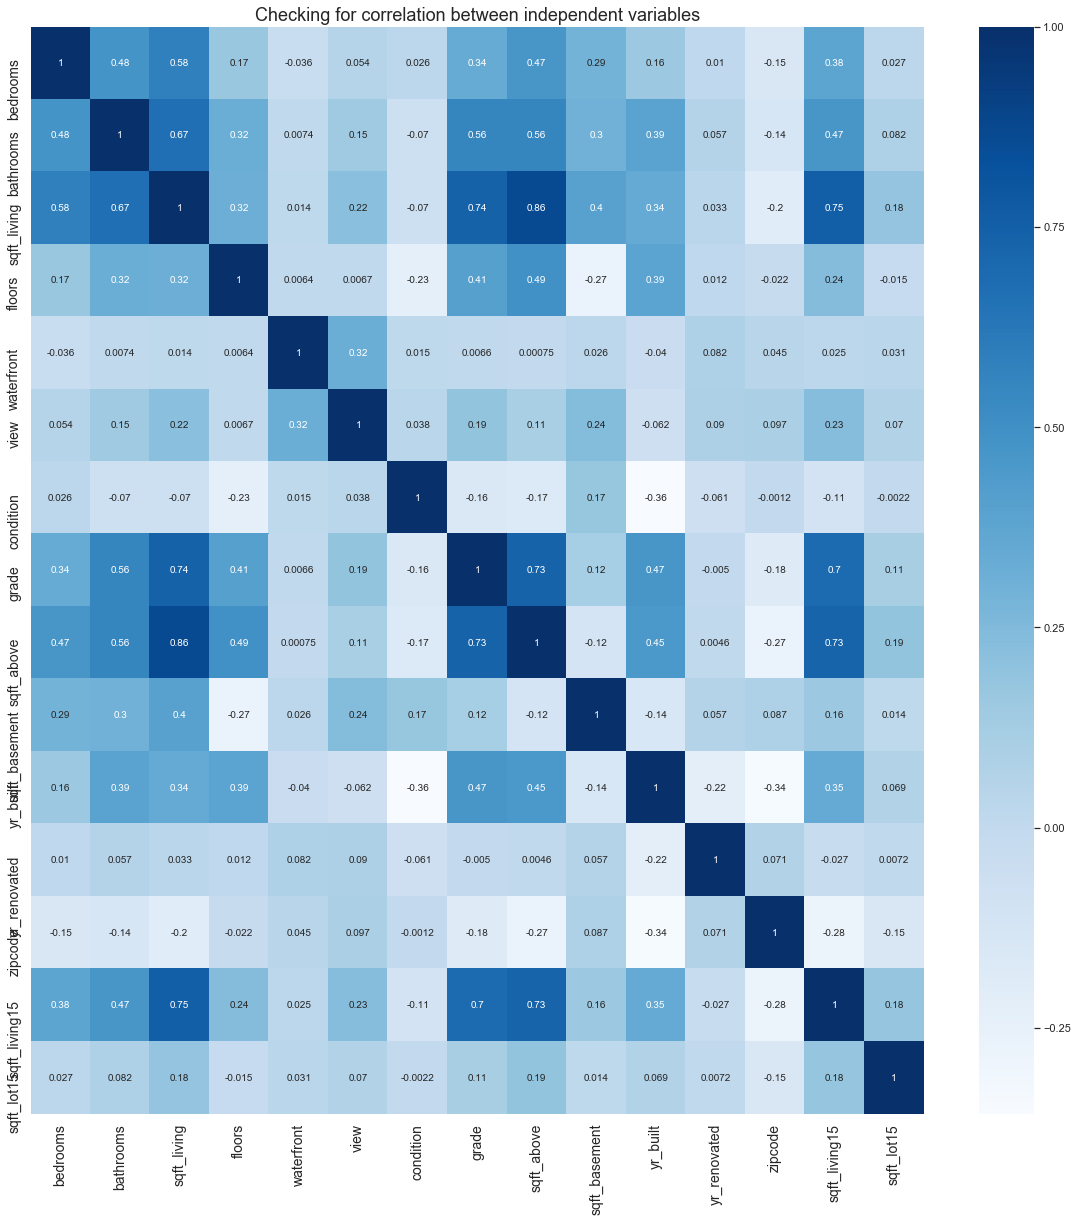

In [136]:
plt.figure(figsize=(20,20))
sns.heatmap(data.drop(['price','sqft_lot'],axis=1).corr(),annot=True,cmap='Blues')
plt.title('Checking for correlation between independent variables',fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [137]:
predictions=pd.DataFrame()  #creating a dataset with ration of our residuals 

In [145]:
predictions['y_test']=y_test
predictions['y_pred']=y_pred
predictions['residuals']=y_test-y_pred
predictions['difference_ratio']=predictions['residuals']/y_pred
predictions['difference_ratio']=predictions['difference_ratio']*100
predictions['difference_ratio_%']=predictions['difference_ratio'].round()

In [148]:
predictions=predictions.reset_index(drop=True)   #reseting the index of the dataset

In [191]:
predictions.head()

y_test         y_pred      residuals  difference_ratio  difference_ratio_%
0  672000  459650.268858  212349.731142         46.198109                46.0
1  367899  485106.968448 -117207.968448        -24.161263               -24.0
2  287000  430851.645604 -143851.645604        -33.387744               -33.0
3  540000  540659.675036    -659.675036         -0.122013                -0.0
4  400000  394455.722870    5544.277130          1.405551                 1.0

In [174]:
print('the mean absolute error is {}'.format(mean_absolute_error(y_test,y_pred)))  

the mean absolute error is 116651.42455552565
